In [1]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from scipy.stats import norm, probplot
import statsmodels.api as sm
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

plt.style.use('fivethirtyeight')
# # plt.style.use('ggplot')


/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


 Funções


In [43]:
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

def regressNC(X,Y):
    model = sm.OLS(Y,X)
    results = model.fit()
    return results

In [44]:
#lendo informação obtida no site coinmarketcap.com
#current = pd.read_json('https://api.coinmarketcap.com/v1/ticker/') 
cmc_2017 = pd.read_csv("coinmarketcap_06122017.csv")
#imprimindo as primeiras linhas do dataset
cmc_2017.head(10)

,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000,12739.500000,1,BTC,1.672352e+07
1,1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,0.036177,452.652000,2,ETH,9.616537e+07
2,2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,0.120050,1502.090000,3,BCH,1.684044e+07
3,3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,0.000424,5.307460,4,MIOTA,2.779530e+09
4,4,2.315050e+08,3.873915e+10,ripple,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,0.000019,0.241754,5,XRP,9.999309e+10
5,5,2.289430e+08,7.736420e+06,dash,1512549542,5.794076e+09,1.890000e+07,Dash,1.22,-3.31,10.64,0.059856,748.935000,6,DASH,7.736420e+06
6,6,4.093420e+08,5.415391e+07,litecoin,1512549542,5.634498e+09,8.400000e+07,Litecoin,-0.17,0.80,3.68,0.008316,104.046000,7,LTC,5.415391e+07
7,7,1.384070e+08,1.669097e+07,bitcoin-gold,1512549582,4.920065e+09,2.100000e+07,Bitcoin Gold,-0.86,-8.65,-11.24,0.023559,294.774000,8,BTG,1.679097e+07
8,8,5.498600e+08,1.544296e+07,monero,1512549544,4.331688e+09,NaN,Monero,-2.00,25.65,41.23,0.022418,280.496000,9,XMR,1.544296e+07
9,9,6.164750e+07,2.592707e+10,cardano,1512549579,3.231420e+09,4.500000e+10,Cardano,-0.28,-5.80,-8.25,0.000010,0.124635,10,ADA,3.111248e+10


In [45]:
#realizando os mesmos passos feitos acima para 2018
cmc_2018 = pd.read_csv("coinmarketcap_06012018.csv")
cmc_2018.head(10)

,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,0,22081300000,16785225,bitcoin,1515230661,284909052105,2.100000e+07,Bitcoin,-0.42,5.76,26.04,1.000000,16973.800000,1,BTC,16785225
1,1,5221370000,38739144847,ripple,1515230641,119207709132,1.000000e+11,Ripple,-0.26,-9.23,24.15,0.000186,3.077190,2,XRP,99993093880
2,2,5705690000,96803840,ethereum,1515230649,100115499075,NaN,Ethereum,0.29,-1.04,45.01,0.062517,1034.210000,3,ETH,96803840
3,3,1569900000,16896225,bitcoin-cash,1515230652,44424061657,2.100000e+07,Bitcoin Cash,0.03,7.99,2.81,0.158934,2629.230000,4,BCH,16896225
4,4,428305000,25927070538,cardano,1515230654,25916647856,4.500000e+10,Cardano,0.39,-5.87,64.99,0.000060,0.999598,5,ADA,31112483745
5,5,2105240000,54637708,litecoin,1515230641,16574020942,8.400000e+07,Litecoin,2.31,22.26,32.85,0.018337,303.344000,6,LTC,54637708
6,6,146039000,8999999999,nem,1515230644,14813369998,NaN,NEM,-1.82,-2.53,69.65,0.000099,1.645930,7,XEM,8999999999
7,7,656389000,17877794558,stellar,1515230643,12634630726,NaN,Stellar,1.58,-4.94,110.28,0.000043,0.706722,8,XLM,103570548975
8,8,2971610000,65748192475,tron,1515230654,11741640953,NaN,TRON,-1.80,-12.63,434.36,0.000011,0.178585,9,TRX,100000000000
9,9,194039000,2779530283,iota,1515230652,11143859582,2.779530e+09,IOTA,-3.03,0.89,19.45,0.000242,4.009260,10,MIOTA,2779530283


In [46]:
# #juntando ambos os datasets --> NAO FAZ MUITO SENTIDO
# cmc = pd.merge(cmc_2017,cmc_2018,on="")
# cmc.head()

In [47]:
#listando as colunas do dataset
list(cmc_2017)

['Unnamed: 0',
 '24h_volume_usd',
 'available_supply',
 'id',
 'last_updated',
 'market_cap_usd',
 'max_supply',
 'name',
 'percent_change_1h',
 'percent_change_24h',
 'percent_change_7d',
 'price_btc',
 'price_usd',
 'rank',
 'symbol',
 'total_supply']

In [48]:
# cmc_2017["name"].value_counts(True)*100

In [49]:
# dfc = cmc_2017["name"].value_counts()
# dfc.plot(kind='bar', legend=False)
# GRAFICO ABSURDAMENTE PESADO

In [50]:
# Selecionando as colunas 'name' e 'market_cap_usd'
market_cap_2017 = cmc_2017[['name', 'market_cap_usd']]
market_cap_2018 = cmc_2018[['name', 'market_cap_usd']]

# Contando o número de valores de cada uma delas
market_cap_2017.count()

name              1326
market_cap_usd    1031
dtype: int64

nota-se que há mais ids que market caps!

In [51]:
# Filtrando as linhas sem um market capitalization
# market_cap = market_cap.query('market_cap_usd > 0')
market_cap_2017 = market_cap_2017[market_cap_2017["market_cap_usd"]>0]
market_cap_2018 = market_cap_2018[market_cap_2018["market_cap_usd"]>0]

# Contando o número de valores novamente
market_cap_2017.count()

name              1031
market_cap_usd    1031
dtype: int64

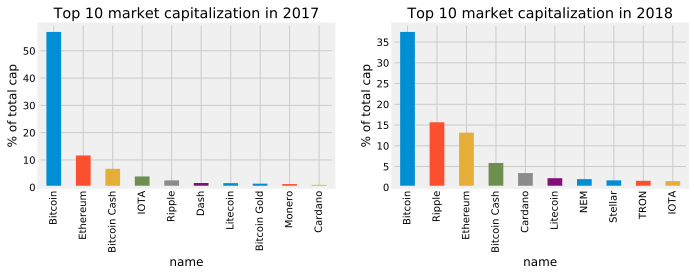

In [52]:
# Selecionando as 10 primeiras linhas e setando o index via nome da moeda
market_cap10_2017 = market_cap_2017.head(10).set_index('name')
market_cap10_2018 = market_cap_2018.head(10).set_index('name')

# Calculando porcentagem do market cap da moeda em relação ao total
market_cap10_2017 = market_cap10_2017.assign(market_cap_perc_2017 = lambda x: (x["market_cap_usd"] / market_cap_2017["market_cap_usd"].sum()) * 100)
market_cap10_2018 = market_cap10_2018.assign(market_cap_perc_2018 = lambda x: (x["market_cap_usd"] / market_cap_2018["market_cap_usd"].sum()) * 100)

# Plotando o gráfico de barras para analisar o tamanho que cada moeda tem no mercado de criptos
plt.figure(figsize=(16,3))
plt.subplot(131)
plot = market_cap10_2017.market_cap_perc_2017.plot.bar(title='Top 10 market capitalization in 2017')
plot.set_ylabel('% of total cap')

plt.subplot(132)
plot = market_cap10_2018.market_cap_perc_2018.plot.bar(title='Top 10 market capitalization in 2018')
plot.set_ylabel('% of total cap');

Se formos analisar as top 3 criptomoedas mais dominantes do mercado em ambos os anos, conseguimos perceber duas que foram recorrentes: BITCOIN E ETHEREUM.

In [53]:
# get market info for bitcoin from the start of 2016 to the current day
bitcoin_market_info = pd.read_html("https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130428&end="+time.strftime("%Y%m%d"))[0]
# convert the date string to the correct date format
bitcoin_market_info = bitcoin_market_info.assign(Date=pd.to_datetime(bitcoin_market_info['Date']))
# when Volume is equal to '-' convert it to 0
bitcoin_market_info.loc[bitcoin_market_info['Volume']=="-",'Volume']=0
# convert to int
bitcoin_market_info['Volume'] = bitcoin_market_info['Volume'].astype('int64')
# sometime after publication of the blog, coinmarketcap starting returning asterisks in the column names
# this will remove those asterisks
bitcoin_market_info.columns = bitcoin_market_info.columns.str.replace("*", "")
# look at the first few rows
bitcoin_market_info.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2018-11-21,4465.54,4675.73,4343.98,4602.17,6120120000,80020171047
1,2018-11-20,4863.93,4951.61,4272.11,4451.87,8428290000,77401044320
2,2018-11-19,5620.78,5620.78,4842.91,4871.49,7039560000,84688539692
3,2018-11-18,5559.74,5653.61,5559.74,5623.54,4159680000,97753714643
4,2018-11-17,5578.58,5578.58,5519.56,5554.33,4303150000,96542098114


In [54]:
# get market info for ethereum from the start of 2016 to the current day
ethereum_market_info = pd.read_html("https://coinmarketcap.com/currencies/ethereum/historical-data/?start=20130428&end="+time.strftime("%Y%m%d"))[0]
# convert the date string to the correct date format
ethereum_market_info = ethereum_market_info.assign(Date=pd.to_datetime(ethereum_market_info['Date']))
# when Volume is equal to '-' convert it to 0
# ethereum_market_info.loc[ethereum_market_info['Volume']=="-",'Volume']=0
# convert to int
ethereum_market_info['Volume'] = ethereum_market_info['Volume'].astype('int64')
# sometime after publication of the blog, coinmarketcap starting returning asterisks in the column names
# this will remove those asterisks
ethereum_market_info.columns = ethereum_market_info.columns.str.replace("*", "")
# look at the first few rows
ethereum_market_info.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2018-11-21,131.14,138.89,125.76,136.70,2685930000,14127420909
1,2018-11-20,148.81,151.25,126.36,130.34,3134410000,13467303239
2,2018-11-19,177.18,177.18,147.85,149.18,2745160000,15410551811
3,2018-11-18,174.18,179.15,174.18,177.07,1810920000,18288411984
4,2018-11-17,175.36,175.85,172.87,174.00,1832800000,17968221715


In [55]:
bitcoin_market_info['Close'].describe()

count     2034.000000
mean      2280.187173
std       3443.225874
min         68.430000
25%        320.270000
50%        596.425000
75%       2576.057500
max      19497.400000
Name: Close, dtype: float64

In [56]:
#bitcoin_market_info['Volume'].describe()

In [57]:
ethereum_market_info['Close'].describe()

count    1203.000000
mean      214.045211
std       278.868059
min         0.434829
25%         9.965000
50%        45.300000
75%       326.770000
max      1396.420000
Name: Close, dtype: float64

In [58]:
#ethereum_market_info['Volume'].describe()

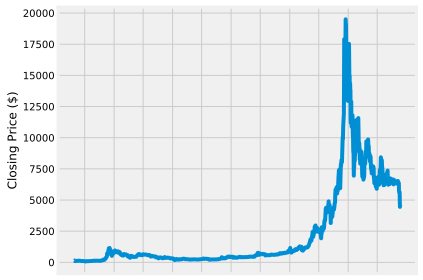

In [59]:
fig, ax1 = plt.subplots(1,1, gridspec_kw = {'height_ratios':[3]})
ax1.set_ylabel('Closing Price ($)',fontsize=12)
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,7]])
ax1.set_xticklabels('')
ax1.plot(bitcoin_market_info['Date'].astype(datetime.datetime),bitcoin_market_info['Close'])
fig.tight_layout()
plt.show()

In [60]:
Ouro = pd.read_excel('XAU_USD Historical Data (1) 2.xlsx')
Ouro = Ouro.assign(Date=pd.to_datetime(Ouro['Date']))
Ouro["Delta Ouro"] = Ouro["Price"] - Ouro["Open"]
Ouro.set_index('Date',inplace = True)
Ouro.head()

,Price,Open,High,Low,Change %,Delta Ouro
Date,,,,,,
2018-11-21,1225.83,1221.74,1230.12,1219.87,0.0035,4.09
2018-11-20,1221.55,1224.37,1229.17,1219.67,-0.0020,-2.82
2018-11-19,1224.05,1221.76,1225.26,1217.52,0.0012,2.29
2018-11-18,1222.62,1222.49,1222.84,1221.69,0.0009,0.13
2018-11-16,1221.47,1213.02,1225.37,1212.48,0.0070,8.45


TABELA SEMANAL

In [61]:
Ouro_Semanal = pd.DataFrame({'Date':pd.date_range('2013-05-01', '2018-11-01', freq='7d')})
Ouro_Semanal.set_index('Date',inplace = True)
Ouro_Semanal = Ouro_Semanal.join(Ouro['Price'])
Ouro_Semanal  = Ouro_Semanal.pct_change().dropna()
Ouro_Semanal.head()

,Price
Date,
2013-05-08,0.010428
2013-05-15,-0.054250
2013-05-22,-0.016871
2013-05-29,0.017197
2013-06-05,0.007430


In [62]:
bitcoin_market_info.set_index('Date',inplace = True)
bitcoin_market_info_Semanal = pd.DataFrame({'Date':pd.date_range('2013-05-01', '2018-11-01', freq='7d')})
bitcoin_market_info_Semanal.set_index('Date',inplace = True)
bitcoin_market_info_Semanal = bitcoin_market_info_Semanal.join(bitcoin_market_info['Close'])
bitcoin_market_info_Semanal.head()

,Close
Date,
2013-05-01,116.99
2013-05-08,113.57
2013-05-15,114.22
2013-05-22,123.89
2013-05-29,132.30


In [63]:
bitcoin_market_info_Semanal  = bitcoin_market_info_Semanal.pct_change().dropna()
bitcoin_market_info_Semanal.head()

,Close
Date,
2013-05-08,-0.029233
2013-05-15,0.005723
2013-05-22,0.084661
2013-05-29,0.067883
2013-06-05,-0.080499


Regressāo semanal

Sem a constante

In [70]:
Semanal = bitcoin_market_info_Semanal.join(Ouro_Semanal, how='inner', lsuffix='_btc', rsuffix='_gold').dropna()
Y = Semanal['Close']#DeltaBit
X = Semanal['Price']#PreçoMensal
Resultado = regressNC(X,Y)
Resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                   0.03391
Date:                Thu, 22 Nov 2018   Prob (F-statistic):              0.854
Time:                        17:52:58   Log-Likelihood:                 182.11
No. Observations:                 287   AIC:                            -362.2
Df Residuals:                     286   BIC:                            -358.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Price         -0.0745      0.404     -0.184      0.854      -0.870       0.722
==============================================================================
Omnibus:                       75.701   Durbin-Watson:                   1.577
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              358.060
Skew:                           0.990   Prob(JB):                     1.77e-78
Kurtosis:                       8.102   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Com a constante:

In [71]:
Resultado = regress(X,Y)
Resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                   0.01348
Date:                Thu, 22 Nov 2018   Prob (F-statistic):              0.908
Time:                        17:53:37   Log-Likelihood:                 186.21
No. Observations:                 287   AIC:                            -368.4
Df Residuals:                     285   BIC:                            -361.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0216      0.007      2.876      0.004       0.007       0.036
Price         -0.0464      0.399     -0.116      0.908      -0.833       0.740
==============================================================================
Omnibus:                       75.808   Durbin-Watson:                   1.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              359.160
Skew:                           0.991   Prob(JB):                     1.02e-78
Kurtosis:                       8.110   Cond. No.                         53.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

TABELA MENSAL

In [65]:
Ouro_Mensal = pd.DataFrame({'Date':pd.date_range('2013-05-01', '2018-11-01', freq='30d')})
Ouro_Mensal.set_index('Date',inplace = True)
Ouro_Mensal = Ouro_Mensal.join(Ouro['Price']).dropna()
Ouro_Mensal = Ouro_Mensal.pct_change().dropna()
Ouro_Mensal.head()

,Price
Date,
2013-05-31,-0.048504
2013-07-30,-0.042974
2013-08-29,0.060988
2013-10-28,-0.039801
2013-11-27,-0.084899


In [66]:
bitcoin_market_info_Mensal = pd.DataFrame({'Date':pd.date_range('2013-05-01', '2018-11-01', freq='30d')})
bitcoin_market_info_Mensal.set_index('Date',inplace = True)
bitcoin_market_info_Mensal = bitcoin_market_info_Mensal.join(bitcoin_market_info['Close']).dropna()
bitcoin_market_info_Mensal = bitcoin_market_info_Mensal.pct_change().dropna()
bitcoin_market_info_Mensal.head()

,Close
Date,
2013-05-31,0.102658
2013-06-30,-0.251085
2013-07-30,0.117793
2013-08-29,0.133346
2013-09-28,0.101234


Regressão linear mensal

In [72]:
Mensal = bitcoin_market_info_Mensal.join(Ouro_Mensal, how='inner', lsuffix='_btc', rsuffix='_gold').dropna()
Y = Mensal['Close']#DeltaBit
X = Mensal['Price']#PreçoMensal
Resultado = regress(X,Y)
Resultado.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     4.194
Date:                Thu, 22 Nov 2018   Prob (F-statistic):             0.0462
Time:                        17:53:59   Log-Likelihood:                -44.043
No. Observations:                  49   AIC:                             92.09
Df Residuals:                      47   BIC:                             95.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1654      0.087      1.906      0.063      -0.009       0.340
Price         -3.6701      1.792     -2.048      0.046      -7.275      -0.065
==============================================================================
Omnibus:                       81.522   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1307.469
Skew:                           4.417   Prob(JB):                    1.22e-284
Kurtosis:                      26.714   Cond. No.                         20.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

TABELA SEMESTRAL

In [147]:
Ouro_Semestral = pd.DataFrame({'Date':pd.date_range('2013-03-30', '2018-10-31', freq='6m')})
Ouro_Semestral.set_index('Date',inplace = True)
Ouro_Semestral = Ouro_Semestral.join(Ouro['Price'])
Ouro_Semestral = Ouro_Semestral.pct_change().dropna()
Ouro_Semestral.head()

,Price
Date,
2014-03-31,-0.032616
2014-09-30,-0.058408
2015-03-31,-0.021286
2015-09-30,-0.057879
2016-03-31,0.105561


In [148]:
bitcoin_market_info_Semestral = pd.DataFrame({'Date':pd.date_range('2013-03-30', '2018-10-31', freq='6m')})
bitcoin_market_info_Semestral.set_index('Date',inplace = True)
bitcoin_market_info_Semestral = bitcoin_market_info_Semestral.join(bitcoin_market_info['Close']).dropna()
bitcoin_market_info_Semestral = bitcoin_market_info_Semestral.pct_change().dropna()
bitcoin_market_info_Semestral.head()

,Close
Date,
2014-03-31,2.436090
2014-09-30,-0.153304
2015-03-31,-0.368843
2015-09-30,-0.033412
2016-03-31,0.765356


In [149]:
Semestral = bitcoin_market_info_Anual.join(Ouro_Anual, how='inner', lsuffix='_btc', rsuffix='_gold').dropna()
Y = Semestral['Close']#DeltaBit
X = Semestral['Price']#PreçoMensal
Resultado = regress(X,Y)
Resultado.summary()

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                 -0.140
Method:                 Least Squares   F-statistic:                    0.1428
Date:                Thu, 22 Nov 2018   Prob (F-statistic):              0.718
Time:                        18:38:56   Log-Likelihood:                -9.8670
No. Observations:                   8   AIC:                             23.73
Df Residuals:                       6   BIC:                             23.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5029      0.346      1.454      0.196      -0.343       1.349
Price          2.1814      5.772      0.378      0.718     -11.942      16.305
==============================================================================
Omnibus:                       11.561   Durbin-Watson:                   1.430
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                3.967
Skew:                           1.576   Prob(JB):                        0.138
Kurtosis:                       4.404   Cond. No.                         17.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

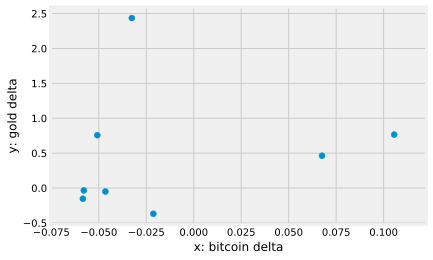

In [150]:
x = Semestral['Price'] #preco do bitcoin
y = Semestral['Close'] #preco do ouro
plt.scatter(x,y);
plt.xlabel("x: bitcoin delta");
plt.ylabel("y: gold delta");

REGRESSÃO LINEAR SIMPLES

In [28]:
#Seleciona o preço final da moeda e do ouro, além de remover os NaNs
simples = df.dropna()

# #Transforma a renda na escala de milhares de dólares
# df['2010_income'] /= 1000

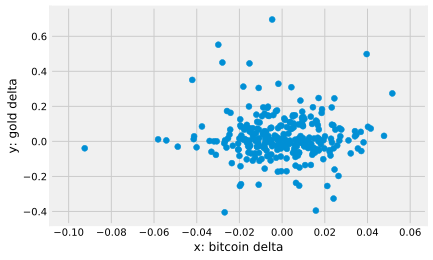

In [29]:
x = df['Price'] #preco do bitcoin
y = df['Close'] #preco do ouro
plt.scatter(x,y);
plt.xlabel("x: bitcoin delta");
plt.ylabel("y: gold delta");

In [ ]:
yb = y.mean()
xb = x.mean()

Sxy = ((x -xb)*(y -yb)).sum()
Sxx = ((x -xb)**2).sum()

b1 = Sxy/Sxx
b0 = yb - b1*xb

print("beta0: {0}".format(b0))
print("beta1: {0}".format(b1))

In [ ]:
x_v = np.linspace(x.min(), x.max(), 500)
y_v = b0 + b1*x_v
plt.plot(x_v,y_v, color="r") # resultados da regressão
plt.scatter(x, y) # dados

In [ ]:
xc = sm.add_constant(x)
model = sm.OLS(y,xc)
results = model.fit()
results.summary()

In [ ]:
x_vc = sm.add_constant(x_v)
y_vc = results.predict(x_vc)
plt.plot(x_v, y_vc, color="r")
plt.scatter(x,y);

In [ ]:
#verificando normalidade dos resíduos
probplot(results.resid, dist="norm", plot=plt);

In [ ]:
# bitcoin = bitcoin_market_info[::-1]
# x = bitcoin['Close'].values
# y = Ouro['USD$'][((len(Ouro['Data']))-(len(bitcoin['Date']))):len(Ouro['Data'])].values
# plt.scatter(x,y);
# plt.xlabel("x: bitcoin closing");
# plt.ylabel("y: gold value");

In [ ]:
# y_ = y.mean()
# x_ = x.mean()

# Sxy = ((x -x_)*(y -y_)).sum()
# Sxx = ((x -x_)**2).sum()

# b1 = Sxy/Sxx
# b0 = y_ - b1*x_

# print("beta0: {0}".format(b0))
# print("beta1: {0}".format(b1))


In [ ]:
# x_v = np.linspace(x.min(), x.max(), 500)
# y_v = b0 + b1*x_v

In [ ]:
# plt.plot(x_v,y_v, color="r") # resultados da regressão
# plt.scatter(x, y); # dados

In [ ]:
# ei = y - b0 
# ei

In [ ]:
# probplot(ei, dist = "norm", plot = plt)

In [ ]:
# xa = sm.add_constant(x)
# model = sm.OLS(y,xa)
# results = model.fit()
# results.summary()

In [ ]:
# x_vc = sm.add_constant(x_v)
# y_vc = results.predict(x_vc)
# plt.plot(x_v, y_vc, color="r")
# plt.scatter(x,y);

REGRESSÃO LINEAR MÚLTIPLA

In [ ]:
# Função utilitária para fazer a regressão com constante adicionada
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
#     model = sm.OLS(Y,X)
    results = model.fit()
    return results




In [ ]:
multipla = df[['Open_btc', 'High_btc', 'Low_btc', 'Close', 'Volume', 'Market Cap','Delta Bitcoin', 'Price', 'Open_gold', 'High_gold', 'Low_gold', 'Change %', 'Delta Ouro',]].dropna()

In [ ]:
Y = multipla['Delta Ouro']
X = multipla[[ 'Open_btc', 'High_btc', 'Close', 'Market Cap', 'Delta Bitcoin' ]]

In [ ]:
results = regress(X,Y)
results.summary()

In [ ]:
X3 = multipla[['Low',
       'Volume']]
results3 = regress(X3, Y)
results3.summary()

In [ ]:
c = results3.params["const"]
w = results3.params["Low"]
y = results3.params["Volume"]

In [ ]:
def f(low, volume):
    return c+w*low + y*volume

In [ ]:
npoints = 100
low = np.linspace(X3["Low"].min(), X3["Low"].max(), npoints)
volume = np.linspace(X3["Volume"].min(), X3["Volume"].max(), npoints)


In [ ]:
low_xx, volume_yy = np.meshgrid(low, volume)

In [ ]:
z = f(low_xx, volume_yy)

In [ ]:
plt3d = plt.figure().gca(projection="3d")
plt3d.plot_surface(low_xx, volume_yy, z)
plt3d.scatter(X3["Low"],X3["Volume"], Y , color="r")